In [8]:
from pathlib import Path
import os
import pandas as pd

from tools.add_AR_cols import add_AR_cols
from data_treatment.box_creator import create_binary_box
import TinyAutoML as tam

if not "root" in locals():
    current_path = Path(os.getcwd())
    root = current_path.parent.absolute()

os.chdir(root)

Here we import the whole cleaned dataset. It is 166 columns for 3692 rows.
We add Auto-lagged cols and the binary target

In [25]:
df = pd.read_csv('database.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = create_binary_box(df, relative_threshold = 0.30, box_length=30).set_index(['Date']).dropna(axis = 0)
df = add_AR_cols(df,7).dropna(axis = 0)
X,y = df.drop('Box', axis=1), df['Box']

cut = int(len(y) * 0.8)

X_train, X_test = X[:cut], X[cut:]
y_train, y_test = y[:cut], y[cut:]

Then we instantiate the MetaPipeline object, we fit it and look at the outputs and scores.



In [26]:
mpipe = tam.Estimator.MetaPipeline()
mpipe.fit(X_train,y_train, grid_search=True)

Correcting non-stationarity on the dataset...
Done.
Calculating columns to keep according to LASSO features selection


100%|██████████| 10/10 [00:00<00:00, 12.88it/s]


	Done.
Training models
Training : 
----> rcf
----> Logistic Regression
----> Gaussian Naive Bayes
----> LDA
	Done.
Results : 
The best estimator is rcf with a cross-validation accuracy (in Sample) of 0.6736342318497365


MetaPipeline()

In [27]:
mpipe.classification_report(X_test,y_test)

Correcting non-stationarity on the dataset...
Done.
              precision    recall  f1-score   support

           0       0.53      0.92      0.68       369
           1       0.67      0.16      0.26       353

    accuracy                           0.55       722
   macro avg       0.60      0.54      0.47       722
weighted avg       0.60      0.55      0.47       722



Correcting non-stationarity on the dataset...
Done.


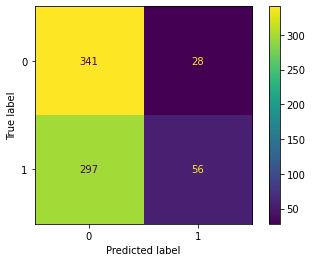

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test[17:],mpipe.predict(X_test))

Correcting non-stationarity on the dataset...
Done.


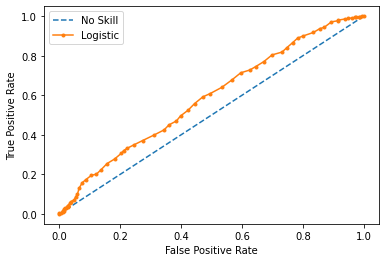

In [29]:
mpipe.roc_curve(X_test,y_test)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test[17:],mpipe.predict(X_test))


Correcting non-stationarity on the dataset...
Done.


0.7146814404432132